In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pickle


C:\Users\mosa\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
! pip install optuna


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/386.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/386.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/386.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/386.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/386.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/386.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/386.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/386.6 kB 81.9 kB/s eta 0:00:05
   --- ------------------------------------ 30.7/386.6 kB 81.9 kB/s eta 0:00:05
   --- ------------------------------------ 30.7/386.6 kB 81.9 kB/s eta 0:00:05
   --- ------------------------------------ 30.7/386.6 kB 81.9 kB/s eta 0:00:05
   --- ------------------------------------ 30.7/386.6 kB 81.9 kB/s eta 0:00:05
   --- -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:

# تحميل البيانات من ملف .pickle
with open('data.pickle', 'rb') as f:
    dataset = pickle.load(f)

data = dataset['data']
labels = dataset['labels']

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data)
df['label'] = labels  # إضافة عمود التسميات

# عرض أول 5 صفوف كمثال
print(df.head())

# عرض معلومات عن الشكل
print("\n📊 عدد الصفوف:", df.shape[0])
print("📊 عدد الأعمدة (شاملة العلامة):", df.shape[1])

          0         1         2         3         4         5         6  \
0  0.000000  0.996148  0.112685  1.000000  0.275115  0.858242  0.519718   
1  0.367866  1.000000  0.704802  0.766760  0.836361  0.527940  0.995946   
2  0.379726  1.000000  0.703841  0.771639  0.841359  0.530290  1.000000   
3  1.000000  1.000000  0.849373  0.716254  0.687654  0.426944  0.506381   
4  1.000000  1.000000  0.828467  0.719801  0.661600  0.434513  0.481232   

          7         8         9  ...        33        34        35        36  \
0  0.812493  0.753839  0.865293  ...  0.559045  0.236632  0.033734  0.615164   
1  0.353627  1.000000  0.162084  ...  0.165663  0.038899  0.457097  0.210148   
2  0.353491  0.996986  0.161934  ...  0.162271  0.043741  0.463066  0.211342   
3  0.286566  0.361476  0.190552  ...  0.453382  0.781709  0.251989  0.410553   
4  0.295174  0.337381  0.198757  ...  0.461181  0.787241  0.271562  0.416862   

         37        38        39        40        41  label  
0  0.10

In [6]:
df.to_csv('dataset.csv', index=False)
print("✅ تم حفظ البيانات في dataset.csv")

✅ تم حفظ البيانات في dataset.csv


In [7]:
# Summary Statistics
print("\nSummary Statistics:\n", df.describe())




Summary Statistics:
                   0             1             2             3             4  \
count  72638.000000  72638.000000  72638.000000  72638.000000  72638.000000   
mean       0.573040      0.915774      0.666547      0.784600      0.685815   
std        0.281134      0.221524      0.316907      0.211406      0.347825   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.403105      1.000000      0.462990      0.759719      0.381494   
50%        0.560525      1.000000      0.778902      0.859233      0.833001   
75%        0.803425      1.000000      0.925903      0.908644      0.984279   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  72638.000000  72638.000000  72638.000000  72638.000000  72638.000000   
mean       0.583754      0.613470      0.461532      0.531956      0.407722   
std        0.201687      0.27

In [8]:
# Missing Values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
label    0
dtype: int64


In [9]:
# Data Consistency - Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())




Number of duplicated rows: 24089


In [10]:
# Label Distribution
print("\nLabel Distribution:\n", df['label'].value_counts())



Label Distribution:
 label
35    3155
21    2820
20    2680
13    2664
11    2656
15    2642
23    2586
31    2540
17    2519
10    2441
32    2433
25    2424
16    2414
18    2403
22    2389
27    2380
30    2352
34    2316
19    2254
33    2026
12    1924
24    1905
14    1842
29    1794
26    1621
28    1457
38    1000
39    1000
36    1000
37     832
42     830
1      700
9      700
7      700
5      700
4      700
3      700
8      698
6      696
2      689
41     609
0      447
Name: count, dtype: int64


In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,label
count,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,...,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000,72638.000000
mean,0.573040,0.915774,0.666547,0.784600,0.685815,0.583754,0.613470,0.461532,0.531956,0.407722,...,0.522325,0.355682,0.604493,0.345474,0.516379,0.384718,0.550239,0.403036,0.564464,21.929692
std,0.281134,0.221524,0.316907,0.211406,0.347825,0.201687,0.276267,0.212018,0.285028,0.254767,...,0.262616,0.344650,0.192485,0.348766,0.222555,0.314719,0.243564,0.317422,0.283867,9.867658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403105,1.000000,0.462990,0.759719,0.381494,0.474514,0.423458,0.289392,0.345561,0.229382,...,0.357093,0.043995,0.489897,0.041053,0.371149,0.107387,0.353067,0.139362,0.295964,14.000000
50%,0.560525,1.000000,0.778902,0.859233,0.833001,0.632120,0.660759,0.490846,0.499958,0.428653,...,0.611230,0.246532,0.598530,0.184644,0.497985,0.271060,0.573120,0.338407,0.645484,22.000000
75%,0.803425,1.000000,0.925903,0.908644,0.984279,0.715037,0.845449,0.594149,0.741980,0.556532,...,0.705709,0.603935,0.704857,0.620552,0.643837,0.674998,0.732474,0.686113,0.783004,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000


🧾 أسماء الأعمدة:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 'label']


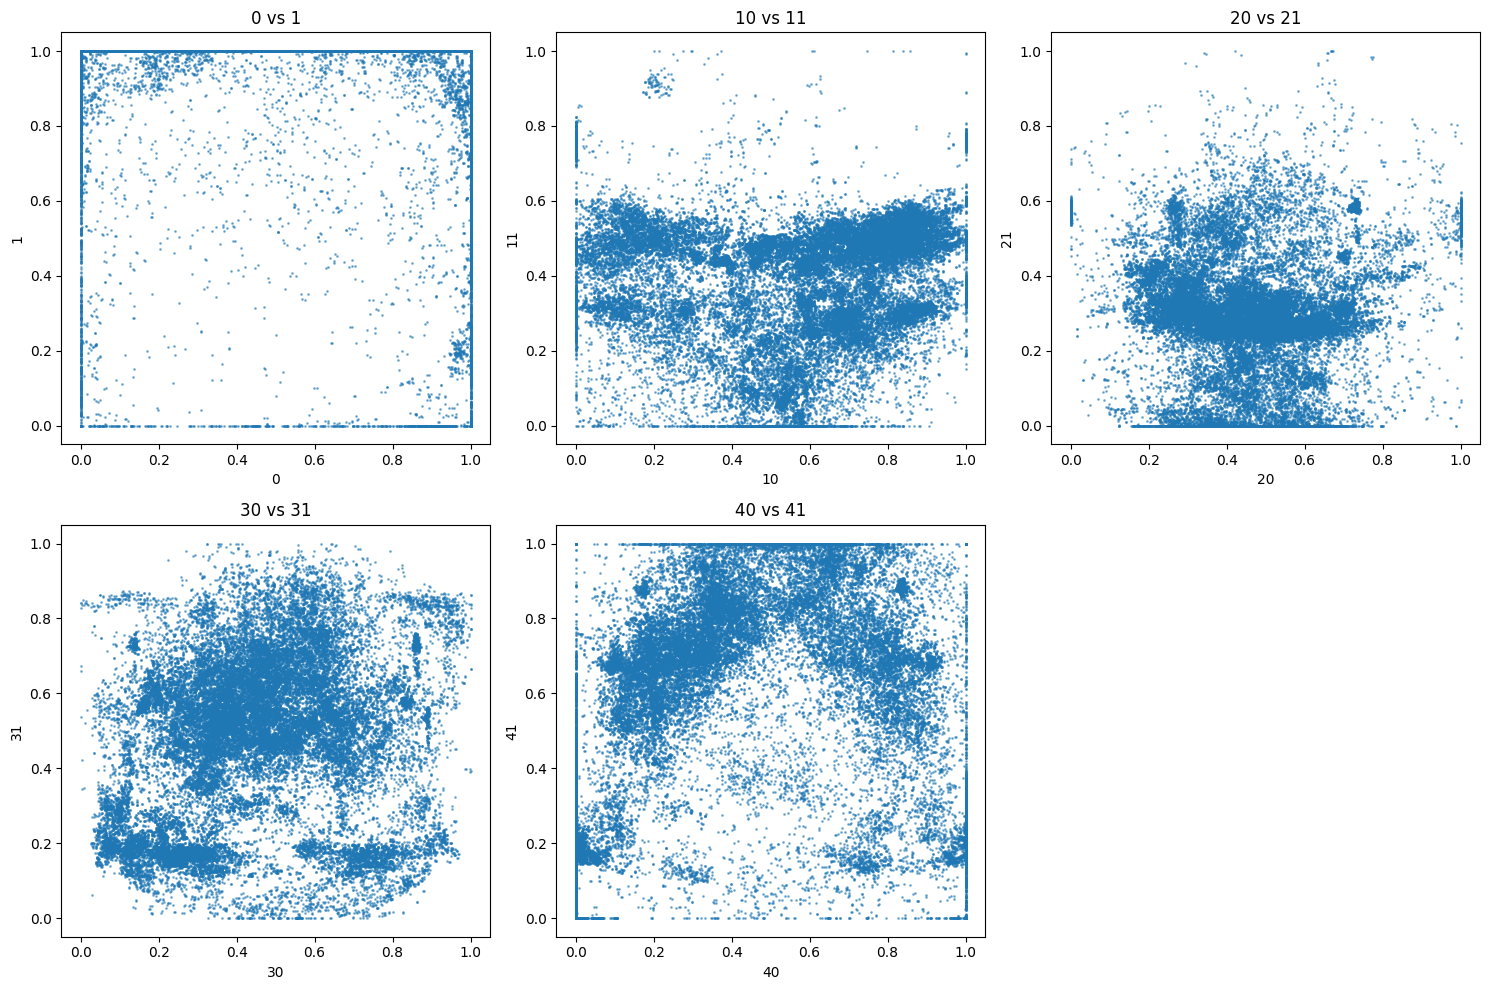

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. تحميل البيانات


# 2. حذف الصفوف المتكررة
df_clean = df.drop_duplicates()

# 3. طباعة أسماء الأعمدة للتأكد منها
print("🧾 أسماء الأعمدة:")
print(df_clean.columns.tolist())

# 4. إذا كانت الأعمدة بالشكل ['x0', 'y0', ...] استخدم هذا:
expected_cols = ['x0', 'y0', 'x5', 'y5', 'x10', 'y10', 'x15', 'y15', 'x20', 'y20']
if all(col in df_clean.columns for col in expected_cols):
    column_pairs = [('x0', 'y0'), ('x5', 'y5'), ('x10', 'y10'), ('x15', 'y15'), ('x20', 'y20')]
# 5. وإذا كانت الأعمدة أرقام فقط (0, 1, 2, ...)، استخدم الأرقام بدلاً من أسماء الأعمدة:
elif all(isinstance(col, int) for col in df_clean.columns[:-1]):
    column_pairs = [(0, 1), (10, 11), (20, 21), (30, 31), (40, 41)]
else:
    raise ValueError("❌ لم أتمكن من تحديد أسماء الأعمدة الصحيحة!")

# 6. رسم Scatter Plots
plt.figure(figsize=(15, 10))
for i, (x_col, y_col) in enumerate(column_pairs):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df_clean[x_col], df_clean[y_col], s=1, alpha=0.5)
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(str(x_col))
    plt.ylabel(str(y_col))
plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# افترض أن df تم تحميله من قبل
# مثل: df = pd.read_csv("data.csv")

# عرض أسماء الأعمدة
print("🧾 أسماء الأعمدة:", df.columns.tolist())

# التأكد من أن الأعمدة المطلوبة موجودة
expected_cols = ['x1', 'y1', 'x5', 'y5', 'x10', 'y10', 'label']
missing_cols = [col for col in expected_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"❌ الأعمدة التالية غير موجودة في DataFrame: {missing_cols}")

# Descriptive statistics
print("\n📊 الوصف الإحصائي:")
print(df.describe())

# Box plots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(['x1', 'y1', 'x5', 'y5', 'x10', 'y10']):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
landmarks = [1, 5, 10, 15, 20]
for i in landmarks:
    cols = [f'x{i}', f'y{i}']
    if all(col in df.columns for col in cols):
        data_corr = df[cols].corr()
        plt.figure(figsize=(5, 4))
        sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Correlation Heatmap for Landmark {i}")
        plt.show()
    else:
        print(f"⚠️ الأعمدة {cols} غير موجودة، سيتم تخطيها.")

# Relationship between coordinates and labels
if 'label' in df.columns and 'x1' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y='x1', data=df)
    plt.title('Distribution of x1 coordinate for different labels')
    plt.xticks(rotation=45, ha='right')
    plt.show()

if 'label' in df.columns and 'y1' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y='y1', data=df)
    plt.title('Distribution of y1 coordinate for different labels')
    plt.xticks(rotation=45, ha='right')
    plt.show()


🧾 أسماء الأعمدة: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 'label']


KeyError: "❌ الأعمدة التالية غير موجودة في DataFrame: ['x1', 'y1', 'x5', 'y5', 'x10', 'y10']"

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load the pre-trained model
with open('model6.p', 'rb') as f:
    model_data = pickle.load(f)
    best_model = model_data['model']

# ✅ Load training history (assuming you saved train_losses and val_losses)
# Replace with your actual file path if different
with open('training_history.pickle', 'rb') as f:
    history = pickle.load(f)
    train_losses = history['train_losses']  # Example key, adjust as per your save
    val_losses = history['val_losses']     # Example key, adjust as per your save

# ✅ Plot train/validation loss
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'b-', label='train')
plt.plot(epochs, val_losses, 'r-', label='validate')
plt.title('Train/Validation loss during training with 20% dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'training_history.pickle'

In [ ]:
انه لا يحفظ او يثبت كل حرف تم التأكد منه :
وهذا كود الصفحة اذا كان هناك شي يجب ان يتغير:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="utf-8" />
    <title>Sign2Text - Sign Language to Text Translation</title>
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />

    <!-- Google Fonts -->
    <link rel="preconnect" href="https://fonts.googleapis.com" />
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin />
    <link
        href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&family=Raleway:wght@600;800&display=swap"
        rel="stylesheet" />

    <!-- Icons & Bootstrap -->
    <link href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.4.1/font/bootstrap-icons.css" rel="stylesheet" />
    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.15.4/css/all.css" />
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0/dist/css/bootstrap.min.css" rel="stylesheet" />

    <!-- Custom Styles -->
    <link rel="stylesheet" href="style.css" />

    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            font-family: "Poppins", sans-serif;
        }

        body {
            background: linear-gradient(to bottom, #000428, #004683);
            background-repeat: no-repeat;
        }

        .hero-header {
            background: linear-gradient(rgba(219, 234, 253, 0.24), rgba(116, 89, 122, 0.19)),
                url("https://coolbackgrounds.io/images/backgrounds/index/ranger-4df6c1b6.png");
            background-size: cover;
            background-position: center center;
            background-repeat: no-repeat;
            margin: 0;
            padding: 0;
        }

        .video-container {
            margin: 0 auto;
            padding: 0;

            background-color: #1e1e1e;
            padding: 10px;
            border-radius: 10px;
            border: 2px solid #000;
        }

        /* .controls {
            margin-top: 1rem;
        } */

        .controls input {
            flex: 1;
        }
        .container-fluid{
          padding: 0;
          margin: 0;
        }
        .py-5{
padding-top: 0rem !important;
    padding-bottom: 0rem !important        }
        @media (max-width: 768px) {
            .controls {
                flex-direction: column;
            }

            .controls input {
                margin-bottom: 10px;
            }
        }
    </style>
</head>

<body>

    <!-- Hero Section -->
    <div class="container-fluid py-5 mb-5 hero-header">
        <div class="container py-5">
            <div class="row justify-content-center">
                <div class="col-lg-8 video-container text-center">
                    <img src="{{ url_for('video_feed') }}" class="img-fluid"
                        alt="Video Feed" style="width: 100%; height: auto;" />
                    
                    <!-- Controls -->
                    <div class="controls d-flex align-items-center justify-content-center flex-wrap mt-3">
                        <input type="text" id="translatedText" class="form-control me-2 mb-2"
                            placeholder="Translated text will appear here" />
                        <button id="resetButton" class="btn btn-danger me-2 mb-2">Reset</button>
                        <button id="speakButton" class="btn btn-primary mb-2">Speak</button>
                    </div>
                </div>
            </div>
        </div>
    </div>

    <!-- JavaScript -->
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.6.4/jquery.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0/dist/js/bootstrap.bundle.min.js"></script>
    <script src="https://cdn.socket.io/4.0.1/socket.io.min.js"></script>

    <script>
        const socket = io();

        // Update the translated text field
        socket.on('prediction', function (data) {
            document.getElementById('translatedText').value = data.text;
        });

        // Reset field
        document.getElementById('resetButton').addEventListener('click', function () {
            document.getElementById('translatedText').value = '';
        });

        // Speak functionality
        document.getElementById('speakButton').addEventListener('click', function () {
            const text = document.getElementById('translatedText').value;
            const utterance = new SpeechSynthesisUtterance(text);
            const voices = speechSynthesis.getVoices();
            utterance.voice = voices.find(voice => voice.name === 'Google UK English Female') || voices[0];
            utterance.rate = 1.0;
            speechSynthesis.speak(utterance);
        });
    </script>
</body>

</html>